In [1]:
# This provides a framework for functions that will be tested as part of module 5 NLP
# You should test your submissions against the cases listed below, they will then be 
# tested against further unseen cases before being reviewed manually.

**THE ASSIGNMENT**

Populate the notebook below to create functions that achieve the following tasks.
They must also pass the tests included at the bottom of the notebook. 
**Part 1**: produce a scraper function that can return the following information when given a URL from the BBC news page.  This function must be iterable - it can be used in a loop to examine a number of URLs and return the following information as a JSON.

a) URL (provided.  For example https://www.bbc.co.uk/news/uk-51004218)

b) Title

c) Date

d) Content (the main body of article)

**Part 2**:  Write a function that when given a block of text (as a string)  returns all the following entities in a json object,  It is suggested that you use a pre-built or custom entity recogniser rather than a rules based method.  There are entity recognisers in the following python packages: NLTK, spacy

a) people

b) places

c) organisations 

**CONSTRAINTS**
The code must run in Google Colab.

Do not change the name of the functions or their inputs.

Your functions will be expected to return outputs as specified in the template functions.

You may add additional functions as desired.

Do not change the test cases at the bottom.

In [6]:
#Do not chance these dependencies
import pytest
# Import your dependencies here
!pip install beautifulsoup4
!pip install svgling
import requests
import csv
from bs4 import BeautifulSoup as BS
import pandas as pd
import re
import json
import nltk
import svgling
nltk.download("averaged_perceptron_tagger")
nltk.download("maxent_ne_chunker")
nltk.download("punkt")
nltk.download("words")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
def bbc_scraper(url):
    """
    This function should take a url, which will relate to a bbc news article 
    and return a json object containing the following fields:
    1) URL (provided.  For example https://www.bbc.co.uk/news/uk-51004218)
    2) Title
    3) Date_published
    4) Content --(the main body of article, this must be one continuous string without linebreaks)
    The function must be iterable (If placed in a for loop and provided with several URLs in 
    turn return the correct json object for each time it is invoked without any manual intervention)
    """
    results_json = {}
    results_json["URL"] = url
    data = requests.get(url)
    bs_data = BS(data.content, 'html.parser')
    results_json["Date_published"] = str(bs_data.find_all("time")[0].text)
    results_json["Title"] = str(bs_data.find("h1", class_="ssrcss-15xko80-StyledHeading e1fj1fc10").text)
    
    content = ""
    for idx, elm in enumerate(bs_data.find_all("div",  class_ ="ssrcss-7uxr49-RichTextContainer e5tfeyi1")):
      sentence = elm.find("p", class_="ssrcss-1q0x1qg-Paragraph eq5iqo00")
      try:
        content += sentence.text
        if idx == len(bs_data.find_all("div",  class_ ="ssrcss-7uxr49-RichTextContainer e5tfeyi1"))-1:
          pass
        else:
          content += " "
      except:
        pass

    results_json["Content"] = content
    results_json = json.dumps(results_json)

    return results_json

In [118]:
def extract_entities(string):
    """
    This function should return a json containing the:
    1) People
    2) Places
    3) Organisations 
    in the text string provided.
    """
    tags = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(string)))
    tags.subtrees
    
    dict_nomen = {"PERSON":"people", "GPE":"places", "ORGANIZATION":"organisations"}

    entities_json = {"people": [], 'places':[], 'organisations': []}

    for node in tags:
      if type(node) == nltk.Tree:
        entities_json[dict_nomen[node.label()]].append(node[0][0])

    entities_json = json.dumps(entities_json)

    return entities_json 

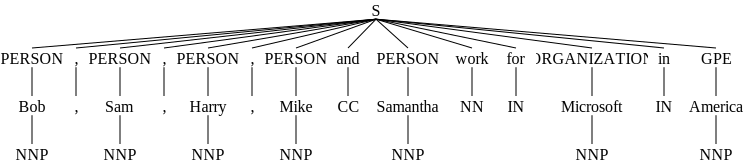

In [116]:
#Test cell to observe behaviour of tree
string = "Bob, Sam, Harry, Mike and Samantha work for Microsoft in America"
tags = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(string)))

tags

In [120]:
####################################################################
# Test cases

def test_bbc_scrape():
    results = {'URL': 'https://www.bbc.co.uk/news/uk-52255054',
                'Title': 'Coronavirus: \'We need Easter as much as ever,\' says the Queen',
                'Date_published': '11 April 2020',
                'Content': '"Coronavirus will not overcome us," the Queen has said, in an Easter message to the nation. While celebrations would be different for many this year, she said: "We need Easter as much as ever." Referencing the tradition of lighting candles to mark the occasion, she said: "As dark as death can be - particularly for those suffering with grief - light and life are greater." It comes as the number of coronavirus deaths in UK hospitals reached 9,875. Speaking from Windsor Castle, the Queen said many religions had festivals celebrating light overcoming darkness, which often featured the lighting of candles. She said: "They seem to speak to every culture, and appeal to people of all faiths, and of none. "They are lit on birthday cakes and to mark family anniversaries, when we gather happily around a source of light. It unites us." The monarch, who is head of the Church of England, said: "As darkness falls on the Saturday before Easter Day, many Christians would normally light candles together.  "In church, one light would pass to another, spreading slowly and then more rapidly as more candles are lit. It\'s a way of showing how the good news of Christ\'s resurrection has been passed on from the first Easter by every generation until now." As far as we know, this is the first time the Queen has released an Easter message. And coming as it does less than a week since the televised broadcast to the nation, it underlines the gravity of the situation as it is regarded by the monarch. It serves two purposes really; it is underlining the government\'s public safety message, acknowledging Easter will be difficult for us but by keeping apart we keep others safe, and the broader Christian message of hope and reassurance.  We know how important her Christian faith is, and coming on the eve of Easter Sunday, it is clearly a significant time for people of all faiths, but particularly Christian faith. She said the discovery of the risen Christ on the first Easter Day gave his followers new hope and fresh purpose, adding that we could all take heart from this.  Wishing everyone of all faiths and denominations a blessed Easter, she said: "May the living flame of the Easter hope be a steady guide as we face the future." The Queen, 93, recorded the audio message in the White Drawing Room at Windsor Castle, with one sound engineer in the next room.  The Palace described it as "Her Majesty\'s contribution to those who are celebrating Easter privately".  It follows a speech on Sunday, in which the monarch delivered a rallying message to the nation. In it, she said the UK "will succeed" in its fight against the coronavirus pandemic, thanked people for following government rules about staying at home and praised those "coming together to help others". She also thanked key workers, saying "every hour" of work "brings us closer to a return to more normal times".'}
    scraper_result = bbc_scraper('https://www.bbc.co.uk/news/uk-52255054')
    assert json.loads(scraper_result) == results


def test_extract_entities_amazon_org():
    input_string = "I work for Amazon."
    results_dict = {'people':[],
                    'places':[],
                    'organisations': ['Amazon']
                    }
    extracted_entities_results = extract_entities(input_string)
    assert json.loads(extracted_entities_results) == results_dict


def test_extract_entities_name():
    input_string = "My name is Bob"
    results_dict = {'people':['Bob'],
                    'places':[],
                    'organisations': []
                    }
    extracted_entities_results = extract_entities(input_string)
    assert json.loads(extracted_entities_results) == results_dict

In [121]:
test_bbc_scrape()
test_extract_entities_amazon_org()
test_extract_entities_name()